<a href="https://colab.research.google.com/github/Charlene958/Data-110/blob/main/Assignment_Week_5%266_Titanic_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Setup
sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 120  # slightly higher resolution for Colab


In [3]:
# Load dataset
df = sns.load_dataset("titanic")

In [4]:
# Quick check
print("Dataset rows, cols:", df.shape)
print("Columns:", list(df.columns))
print()

Dataset rows, cols: (891, 15)
Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']



In [7]:

# PREP: create cleaned subsets

df_fare = df[df["fare"].notna() & (df["fare"] > 0)].copy()
df_fare["survived_label"] = df_fare["survived"].map({0: "Died", 1: "Survived"})

In [9]:
# drop missing ages
df_age = df[df["age"].notna()].copy()

In [12]:
print("positive fare:", df_fare.shape[0])
print("Rows with age:", df_age.shape[0])
print()

positive fare: 876
Rows with age: 714



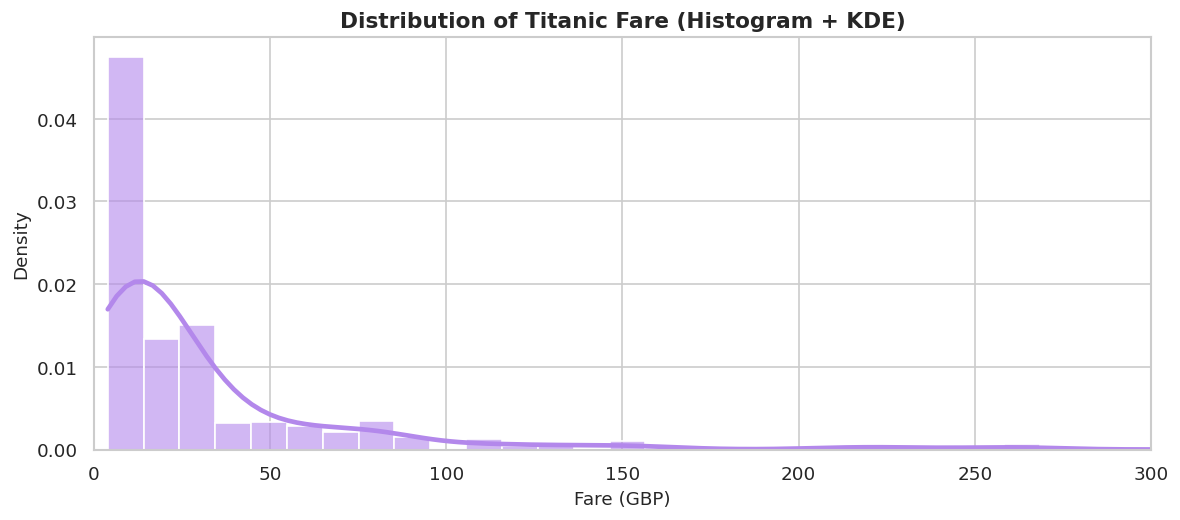

In [38]:
# Distribution (histogram + KDE)
plt.figure(figsize=(10, 4.5))

sns.histplot(
    df_fare["fare"],
    bins=50,
    stat="density",
    color="#b388eb",
    edgecolor="white",
    alpha=0.6,
    kde=True,
    kde_kws={},
    line_kws={"linewidth": 2.8, "color": "#3a0ca3"}
)

plt.xlabel("Fare (GBP)", fontsize=11)
plt.ylabel("Density", fontsize=11)
plt.title("Distribution of Titanic Fare (Histogram + KDE)", fontsize=13, fontweight="bold")

plt.xlim(0, 300)
plt.tight_layout()
plt.show()

This graph shows how Titanic ticket prices are spread out. Most passengers paid low fares, which means many people were in lower classes. Only a small number of passengers paid very high fares. This shows that expensive tickets were less common on the Titanic.

In [17]:
print("Explanation (Fare histogram + KDE):")
print("- The fare distribution is strongly right-skewed: many low fares and a few very large fares.")
print("- High-value outliers (mostly first-class) produce the long right tail.")
print("- Socioeconomic view: most passengers paid low fares (likely 3rd class); a smaller wealthy group paid much more.")
print()

Explanation (Fare histogram + KDE):
- The fare distribution is strongly right-skewed: many low fares and a few very large fares.
- High-value outliers (mostly first-class) produce the long right tail.
- Socioeconomic view: most passengers paid low fares (likely 3rd class); a smaller wealthy group paid much more.



/tmp/ipython-input-2798881020.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Survival Outcome")


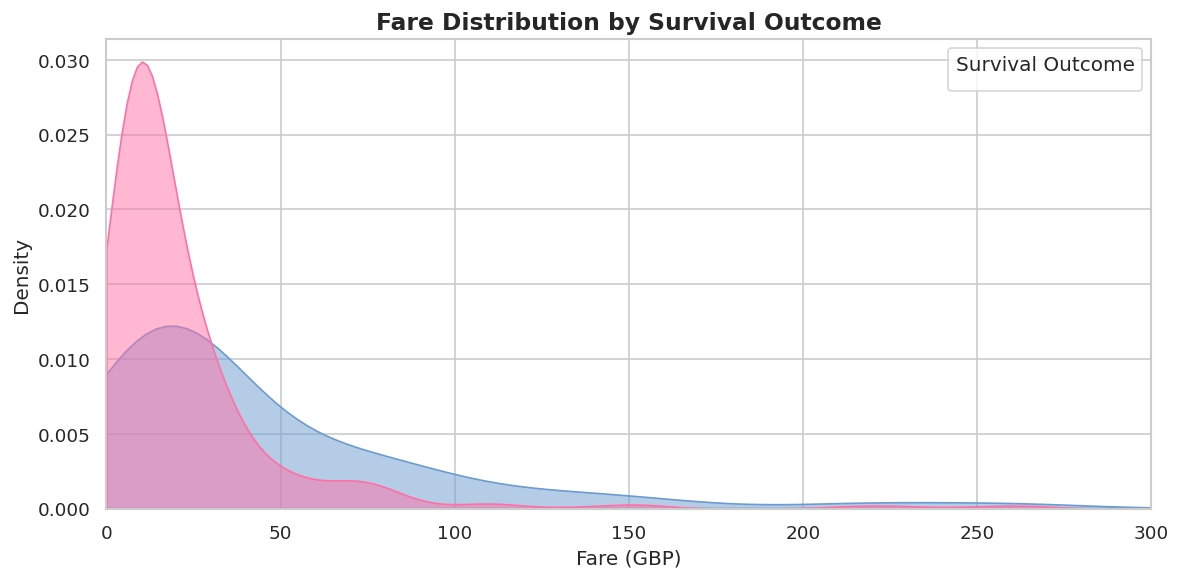

In [35]:
# Fare distribution by Survival Outcome

plt.figure(figsize=(10, 5))


sns.kdeplot(
    data=df_fare,
    x="fare",
    hue="survived_label",
    common_norm=False,
    clip=(0, 600),
    fill=True,
    alpha=0.5,
    palette=["#ff70a6", "#6c9bd1"]
)

plt.xlabel("Fare (GBP)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Fare Distribution by Survival Outcome", fontsize=14, fontweight="bold")

plt.xlim(0, 300)
plt.legend(title="Survival Outcome")

plt.tight_layout()
plt.show()


This graph shows the distribution of Titanic ticket fares for passengers who survived and those who did not. From the graph, we can see that people who paid higher fares were more likely to survive, while most passengers who did not survive had lower ticket fares. This suggests that passengers in higher classes had a better chance of survival compared to those in lower classes.

In [22]:

plt.show()

print("Interpretation (Fare by Survival, shape-focused):")
print("- Both 'Died' and 'Survived' distributions are right-skewed.")
print("- 'Died' has a sharper peak near low fares and a thinner upper tail.")
print("- 'Survived' shows more mass in the moderate-to-high fare range and a heavier tail,")
print("  indicating more high-fare passengers among survivors (shape difference, not only mean).")
print()

Interpretation (Fare by Survival, shape-focused):
- Both 'Died' and 'Survived' distributions are right-skewed.
- 'Died' has a sharper peak near low fares and a thinner upper tail.
- 'Survived' shows more mass in the moderate-to-high fare range and a heavier tail,
  indicating more high-fare passengers among survivors (shape difference, not only mean).



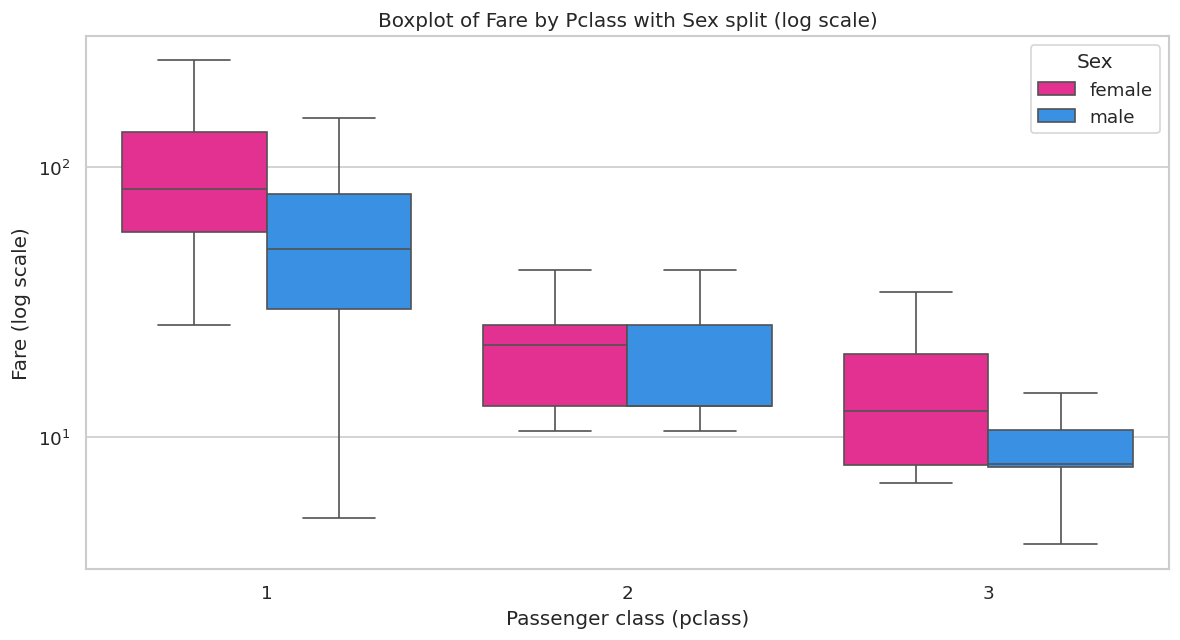

In [26]:
# TASK 4: Boxplot of fare by pclass, split by sex

plt.figure(figsize=(10, 5.5))
palette = {"male": "#1E90FF",
           "female": "#FF1493"}
sns.boxplot(x="pclass", y="fare", hue="sex", data=df_fare, showfliers=False, palette=palette)
plt.yscale("log")
plt.ylabel("Fare (log scale)")
plt.xlabel("Passenger class (pclass)")
plt.title("Boxplot of Fare by Pclass with Sex split (log scale)")
plt.legend(title="Sex")
plt.tight_layout()

What I look at first: each box shows the middle 50% of fares for that passenger class (the box), the line inside the box is the median fare, and the whiskers show the rest of the typical range. Because showfliers=False the very extreme fares (outliers) aren’t shown here.

The y-axis is on a log scale, so big differences in fare (like very expensive tickets) get squished down. That makes it easier to compare groups, but it also means equal vertical distances do not mean equal absolute fare differences.

In [29]:
print("Interpretation (Age by sex - violin):")
print("- Age distributions for males and females overlap substantially; medians are similar.")
print("- Females show slightly narrower central tendency; males have a longer upper tail (more older men).")
print("- This indicates sex-based survival policies were not simply due to dramatic age differences.")
print()


Interpretation (Age by sex - violin):
- Age distributions for males and females overlap substantially; medians are similar.
- Females show slightly narrower central tendency; males have a longer upper tail (more older men).
- This indicates sex-based survival policies were not simply due to dramatic age differences.



/tmp/ipython-input-3340604099.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-3340604099.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


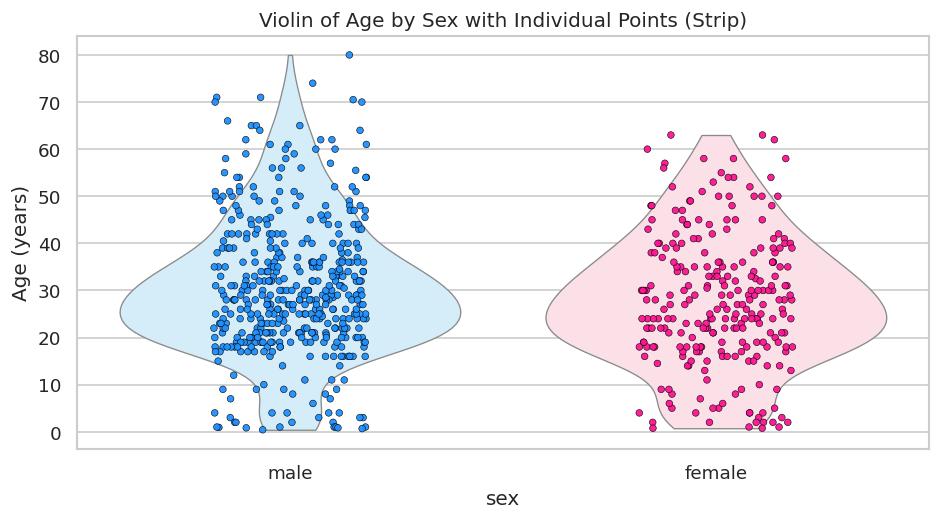

In [34]:
# TASK 6 (updated): Violin + Strip overlay with lighter fills and deep dots
plt.figure(figsize=(8, 4.5))


palette_violin_light = {"male": "#CFEEFF",
                       "female": "#FFDCE6"}

palette_points_dark = {"male": "#1E90FF",
                       "female": "#FF1493"}
sns.violinplot(
    x="sex",
    y="age",
    data=df_age,
    inner=None,
    palette=palette_violin_light,
    cut=0,
    linewidth=0.8
)

sns.stripplot(
    x="sex",
    y="age",
    data=df_age,
    jitter=0.18,
    alpha=0.95,
    size=4,
    palette=palette_points_dark,
    edgecolor="black",
    linewidth=0.35,
    zorder=10
)
plt.title("Violin of Age by Sex with Individual Points (Strip)")
plt.ylabel("Age (years)")
plt.tight_layout()
plt.show()

Each violin shows how ages are spread for men and women; the wider parts mean more people at that age.
The light violins show most passengers are in their 20s–30s (the widest areas).
The dark dots are individual people — you can see children (very low ages) and some older people as single dots.
Men have a slightly longer upper tail (more older men), while women are a bit more concentrated in younger adult ages.
The dots make it easy to spot outliers and see whether a tail is caused by many people or just a few.

In [31]:
print("Interpretation (Violin + points):")
print("- Individual points reveal clusters (many passengers in their 20s-30s) that smoothing can blur.")
print("- Points make it easy to see children (low ages) and isolated older passengers (outliers).")
print("- Overlay shows whether tails are created by many values or a few extreme individuals.")
print()


Interpretation (Violin + points):
- Individual points reveal clusters (many passengers in their 20s-30s) that smoothing can blur.
- Points make it easy to see children (low ages) and isolated older passengers (outliers).
- Overlay shows whether tails are created by many values or a few extreme individuals.

